In [1]:
import graph_tool_extras as gte
import pandas as pd
import csv

In [ ]:
PATH = '../../Datasets/scopus (1).csv'

In [ ]:
g = gte.Graph(directed=False)

In [ ]:
d = {}

with open(PATH) as file:
    reader = csv.reader(file)

    # Ignora a primeira linha, pois ela é o cabeçalho.
    next(reader)

    # Lê o arquivo linha por linha, sem carregá-lo inteiro na memória.
    i = 0
    for line in reader:
        autores = line[0].split(';')
        titulo = line[3]
        for autor in autores:
            if autor not in d: d[autor] = [titulo]
            else: d[autor].append(titulo)
        # print(d)
        # i += 1
        # if i == 2: break

In [ ]:
# # Dicionário para mapear autores para os artigos em que participaram
# autores_para_artigos = {}

# # Lê o arquivo CSV
# with open(PATH) as file:
#     reader = csv.reader(file)
#     next(reader)  # Ignora o cabeçalho

#     for line in reader:
#         autores = line[0].split(';')  # Lista de autores
#         titulo = line[3]  # Título do artigo

#         # Adiciona o título do artigo à lista de artigos de cada autor
#         for autor in autores:
#             if autor not in autores_para_artigos:
#                 autores_para_artigos[autor] = [titulo]
#             else:
#                 autores_para_artigos[autor].append(titulo)

# # Adiciona os vértices (autores) ao grafo
# for autor in autores_para_artigos.keys():
#     g.add_vertex_by_id(autor)

# # Adiciona as arestas (coautorias) ao grafo
# for autor1, artigos1 in autores_para_artigos.items():
#     for autor2, artigos2 in autores_para_artigos.items():
#         if autor1 != autor2:  # Evita criar arestas para o mesmo autor
#             # Verifica se os autores colaboraram em algum artigo
#             if set(artigos1).intersection(artigos2):
#                 g.add_edge_by_ids(autor1, autor2)

In [ ]:
artigos_para_autores = {}

# Lê o arquivo CSV
with open(PATH) as file:
    reader = csv.reader(file)
    next(reader)  # Ignora o cabeçalho

    i = 0

    for line in reader:
        if i == 2000: break
        autores = line[0].split(';')  # Lista de autores
        titulo = line[3]  # Título do artigo

        # Adiciona o artigo ao dicionário de artigos para autores
        artigos_para_autores[titulo] = autores
        i += 1

# Adiciona todos os autores como vértices no grafo
autores_set = set()  # Usamos um conjunto para evitar duplicatas
for autores in artigos_para_autores.values():
    autores_set.update(autores)

for autor in autores_set:
    g.add_vertex_by_id(autor)

for autores in artigos_para_autores.values():
    # Itera sobre todos os pares únicos de autores no mesmo artigo
    for i in range(len(autores)):
        for j in range(i + 1, len(autores)):
            g.add_edge_by_ids(autores[i], autores[j])

In [ ]:
# for u in d.keys():
#     g.add_vertex_by_id(u)

In [ ]:
# for autores, titulo in d.items():
#     for i in range(len(autores)):
#         for j in range(i + 1, len(autores)):
#             if 
#             g.add_edge_by_ids(autores[i], autores[j])

In [ ]:
from graph_tool import draw

In [ ]:
layout = draw.sfdp_layout(g)

In [ ]:
gte.move(g, layout)

In [ ]:
g = gte.clean(g)

In [ ]:
gte.save(g, 'artigo.net.gz')

In [ ]:
import netpixi

In [12]:
resultado = netpixi.render('artigo.net.gz')

In [13]:
resultado.vertex_default(
    size=6,         # tamanho            (padrão: 16)
    bwidth=2,        # espessura da borda (padrão: 2)
)

In [14]:
resultado.edge_default(
    width=0.5,        # espessura         (padrão: 2)
)

In [ ]:
#netpixi.render('artigo.net.gz')

In [ ]:
num_vertices = g.num_vertices()

# Número de arestas
num_arestas = g.num_edges()

print(f"Número de vértices (autores): {num_vertices}")
print(f"Número de arestas (coautorias): {num_arestas}")

In [ ]:
#DEGREE
g = gte.load('artigo.net.gz')

c = gte.total_degree(g)

g.add_vp('degree', c)

In [ ]:
gte.save(g, 'degree.net.gz')

In [ ]:
r = netpixi.render('degree.net.gz')

In [ ]:
r.vertex_scale('degree', 10, 30)

In [ ]:
#BETWEENEES
from graph_tool import centrality
g = gte.load('artigo.net.gz')

c, _ = centrality.betweenness(g)

g.add_vp('betweenness', c)

In [ ]:
gte.save(g, 'betweenness.net.gz')

In [ ]:
r = netpixi.render('betweenness.net.gz')

In [ ]:
r.vertex_scale('betweenness', 10, 30)

In [ ]:
#CLOSENESS
from graph_tool import centrality
g = gte.load('artigo.net.gz')

c = centrality.closeness(g, harmonic=True)

g.add_vp('closeness', c)

In [ ]:
gte.save(g, 'closeness.net.gz')

In [ ]:
r = netpixi.render('closeness.net.gz')

In [ ]:
r.vertex_scale('closeness', 10, 30)

In [ ]:
#RESTRICAO
from graph_tool import centrality
g = gte.load('artigo.net.gz')

c = gte.burt_constraint(g)

g.add_vp('burt_constraint', c)

In [ ]:
gte.save(g, 'structural_holes.net.gz')

In [ ]:
r = netpixi.render('structural_holes.net.gz')

In [ ]:
r.vertex_scale('burt_constraint', 10, 30)

In [2]:
#CONTINUO
import cpnet
import netpixi
g = gte.load('artigo.net.gz')

c, l = gte.coreness(g, cpnet.Rombach)

In [3]:
g.add_vp('coreness', c)

gte.save(g, 'coreness.net.gz')

r = netpixi.render('coreness.net.gz')

In [4]:
r.vertex_scale('coreness', 5, 50)

In [5]:
#DISCRETO
import cpnet
import netpixi

g = gte.load('artigo.net.gz')

c, l = gte.coreness(g, cpnet.Surprise)

g.add_converted_vp('color', c, lambda coreness: 0x00ff00 if round(coreness) == 1 else 0xff0000)

gte.save(g, 'coreness_discreto.net.gz')

r = netpixi.render('coreness_discreto.net.gz');

SystemError: CPUDispatcher(<function _detect_ at 0x7f91e99dfce0>) returned a result with an exception set

In [ ]:
r.vertex_scale('coreness', 5, 50)

In [6]:
#DISTRIBUICAO DEGREE
g = gte.load('artigo.net.gz')
degrees = g.get_total_degrees()

In [7]:
degrees.describe()

count    2476.000000
mean       12.166397
std        15.799852
min         1.000000
25%         5.000000
50%         8.000000
75%        13.000000
max       273.000000
dtype: float64

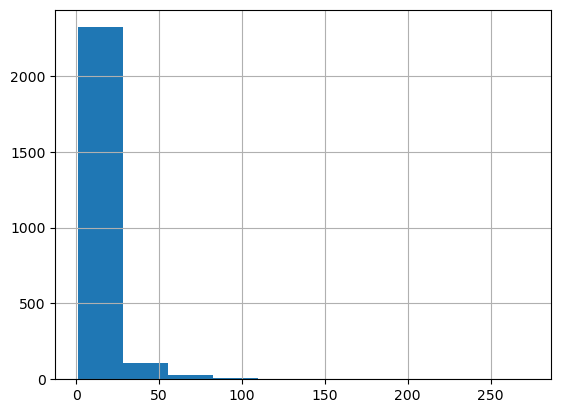

In [8]:
degrees.hist();

In [9]:
import distribution as dst
dst.not_normal(degrees)

np.float64(0.0)

In [10]:
dst.more_powerlaw_than_lognormal(degrees)

Calculating best minimal value for power law fit
/opt/miniconda/envs/jupyterlab/lib/python3.13/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


(np.False_, np.float64(0.5060326269870934))

In [11]:
dst.more_powerlaw_than_exponential(degrees)

Calculating best minimal value for power law fit


(np.True_, np.float64(0.10208639249989478))